# PCA

El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos, preservando la mayor cantidad de variabilidad posible. Matemáticamente, PCA transforma un conjunto de variables posiblemente correlacionadas en un conjunto de variables linealmente no correlacionadas llamadas componentes principales.

A continuación, se presenta un ejemplo detallado de cómo realizar PCA desde un enfoque matemático.

Supuestos del Ejemplo
Supongamos que tenemos un conjunto de datos con dos variables para simplificar el ejemplo:

Variable X: Representa alguna medida cuantitativa (por ejemplo, altura).
Variable Y: Representa otra medida cuantitativa (por ejemplo, peso).

Datos Originales:
 [[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]
Media de cada variable: [1.81 1.91]
Datos Centrados:
 [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
Matriz de Covarianza:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
Valores Propios: [0.0490834  1.28402771]
Vectores Propios:
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]
Valores Propios Ordenados: [1.28402771 0.0490834 ]
Vectores Propios Ordenados:
 [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]
Datos Proyectados en las Componentes Principales:
 [[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


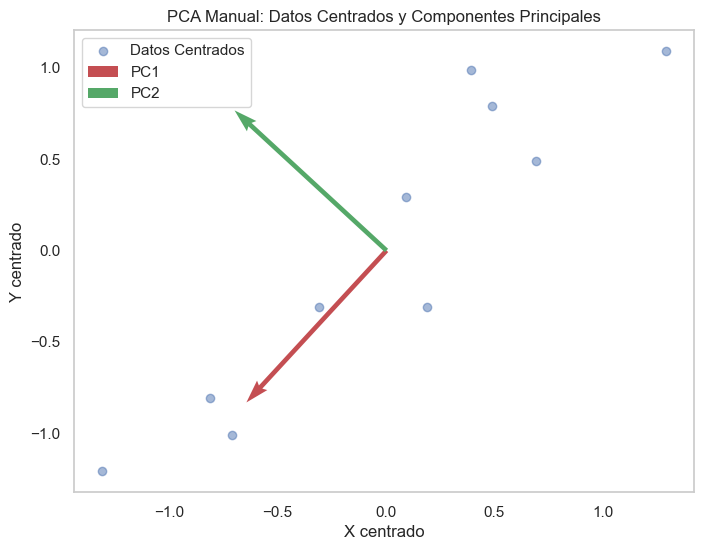

In [44]:
#!pip install numpy matplotlib scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Definimos las observaciones
X = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1])
Y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

# Crear una matriz de datos
data = np.vstack((X, Y)).T
print("Datos Originales:\n", data)


# Calcular la media de cada variable
mean = np.mean(data, axis=0)
print("Media de cada variable:", mean)

# Centralizar los datos
data_centered = data - mean
print("Datos Centrados:\n", data_centered)

# Calcular la matriz de covarianza
cov_matrix = np.cov(data_centered, rowvar=False)
print("Matriz de Covarianza:\n", cov_matrix)

# Calcular valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Valores Propios:", eigenvalues)
print("Vectores Propios:\n", eigenvectors)

# Ordenar los valores propios y los vectores propios
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Valores Propios Ordenados:", sorted_eigenvalues)
print("Vectores Propios Ordenados:\n", sorted_eigenvectors)

# Crear una matriz de vectores propios
principal_components = sorted_eigenvectors

# Proyectar los datos
data_pca = np.dot(data_centered, principal_components)
print("Datos Proyectados en las Componentes Principales:\n", data_pca)

# Graficar los datos centrados
plt.figure(figsize=(8,6))
plt.scatter(data_centered[:,0], data_centered[:,1], alpha=0.5, label='Datos Centrados')

# Dibujar las componentes principales
origin = np.zeros(2)
plt.quiver(*origin, principal_components[0,0], principal_components[1,0], 
           scale=3, color='r', label='PC1')
plt.quiver(*origin, principal_components[0,1], principal_components[1,1], 
           scale=3, color='g', label='PC2')

plt.xlabel('X centrado')
plt.ylabel('Y centrado')
plt.legend()
plt.title('PCA Manual: Datos Centrados y Componentes Principales')
plt.grid()
plt.show()


In [40]:
# Crear una instancia de PCA
pca = PCA(n_components=2)

# Ajustar PCA a los datos centrados
pca.fit(data_centered)

# Transformar los datos
data_pca_sklearn = pca.transform(data_centered)
print("Datos Proyectados con scikit-learn:\n", data_pca_sklearn)

# Valores propios (varianza explicada)
print("Valores Propios (scikit-learn):", pca.explained_variance_)

# Vectores propios
print("Vectores Propios (scikit-learn):\n", pca.components_)


Datos Proyectados con scikit-learn:
 [[ 0.82797019  0.17511531]
 [-1.77758033 -0.14285723]
 [ 0.99219749 -0.38437499]
 [ 0.27421042 -0.13041721]
 [ 1.67580142  0.20949846]
 [ 0.9129491  -0.17528244]
 [-0.09910944  0.3498247 ]
 [-1.14457216 -0.04641726]
 [-0.43804614 -0.01776463]
 [-1.22382056  0.16267529]]
Valores Propios (scikit-learn): [1.28402771 0.0490834 ]
Vectores Propios (scikit-learn):
 [[ 0.6778734   0.73517866]
 [ 0.73517866 -0.6778734 ]]


# CASO TIROIDES
La estandarización es un paso crucial en el Análisis de Componentes Principales (PCA). Consiste en transformar las variables originales para que tengan una media de 0 y una desviación estándar de 1. Esto es importante porque PCA es sensible a las escalas de las variables; variables con escalas mayores dominarán la formación de las componentes principales si no se estandarizan.

La estandarización asegura que todas las variables contribuyan de manera equitativa al análisis de PCA, evitando que variables con escalas mayores dominen las componentes principales simplemente debido a su escala.

La varianza explicada por una componente principal indica la proporción de la variabilidad total en los datos que esa componente captura. Es una medida de cuán representativa es la componente respecto a los datos originales.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



df = pd.read_csv('C:\\Users\\jvelareb\\OneDrive - Universidad Alfonso X el Sabio\\Docencia\\Aprendizaje automático\\Casos_uso\\thyroidDF.csv')


# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

# Información del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())




Primeras 5 filas del dataset:
   age on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29            f                  f                   f    f        f   
1   28            f                  f                   f    f        f   
2   28            f                  f                   f    f        f   
3   28            f                  f                   f    f        f   
4   54            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid query_hyperthyroid  ...  \
0               f              f                 f                  f  ...   
1               f              f                 f                  f  ...   
2               f              f                 f                  f  ...   
3               f              f                 f                  f  ...   
4               f              f                 f                  f  ...   

  hypopituitary psych target_thyro   T3    T

Dataset cargado exitosamente.

Nombres de las columnas en el dataset:
['age', 'on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'hypopi1ui1ary', 'psych', 'target_thyro', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'referral_source', 'patient_id']

Primeras 5 filas del dataset:
   age  on_1hyroxine  query_on_1hyroxine  on_an1i1hyroid_meds  sick  pregnan1  \
0   29             0                   0                    0     0         0   
1   28             0                   0                    0     0         0   
2   28             0                   0                    0     0         0   
3   28             0                   0                    0     0         0   
4   54             0                   0                    0     0         0   

   1hyroid_surgery  I131_1rea1men1  query_hypo1hyroid  query_hyper1hyroid  \
0                0         

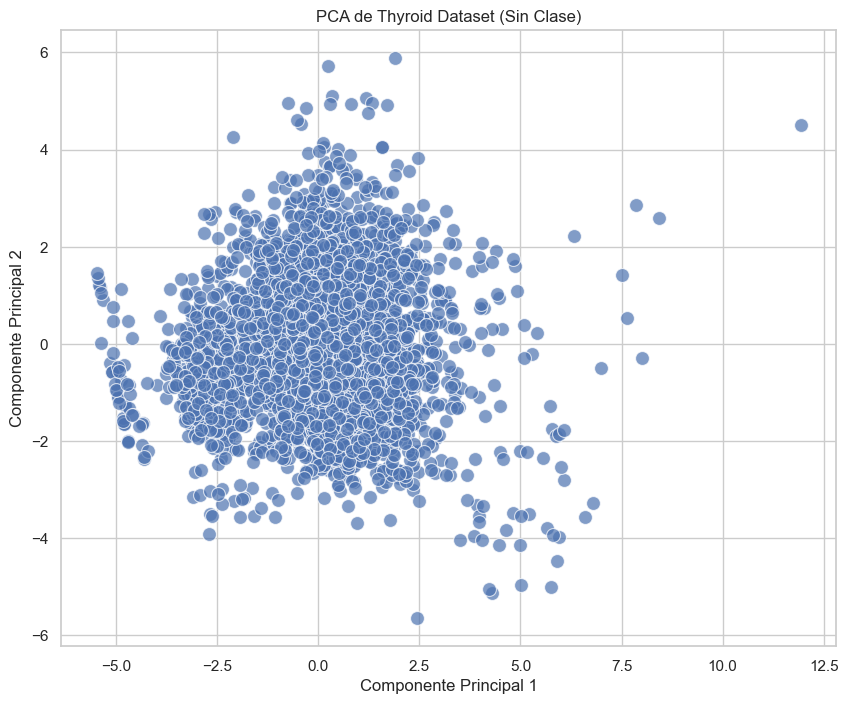


Cargas de las variables en las componentes principales:
                          PC1           PC2
age                 -0.172268  5.482315e-01
on_1hyroxine         0.141028  4.502842e-01
query_on_1hyroxine   0.018883 -1.165180e-02
on_an1i1hyroid_meds -0.035751 -1.734547e-01
sick                -0.082039  1.499876e-01
pregnan1             0.285426 -2.302299e-01
1hyroid_surgery     -0.014754 -5.483972e-02
I131_1rea1men1      -0.023671  3.074002e-01
query_hypo1hyroid   -0.076391  4.123167e-01
query_hyper1hyroid   0.076795 -1.058795e-02
li1hium              0.020664 -1.350800e-01
goi1re               0.069226 -1.731247e-01
1umor                0.055042 -2.232328e-01
hypopi1ui1ary        0.000000  4.957494e-22
psych                0.151675 -3.386624e-01
T3                   0.325702 -4.222602e-01
TT4                  0.839505  1.474489e-01
T4U                  0.651931  5.233368e-02
FTI                  0.724990  2.781818e-01
TBG                  0.074343 -2.508503e-02


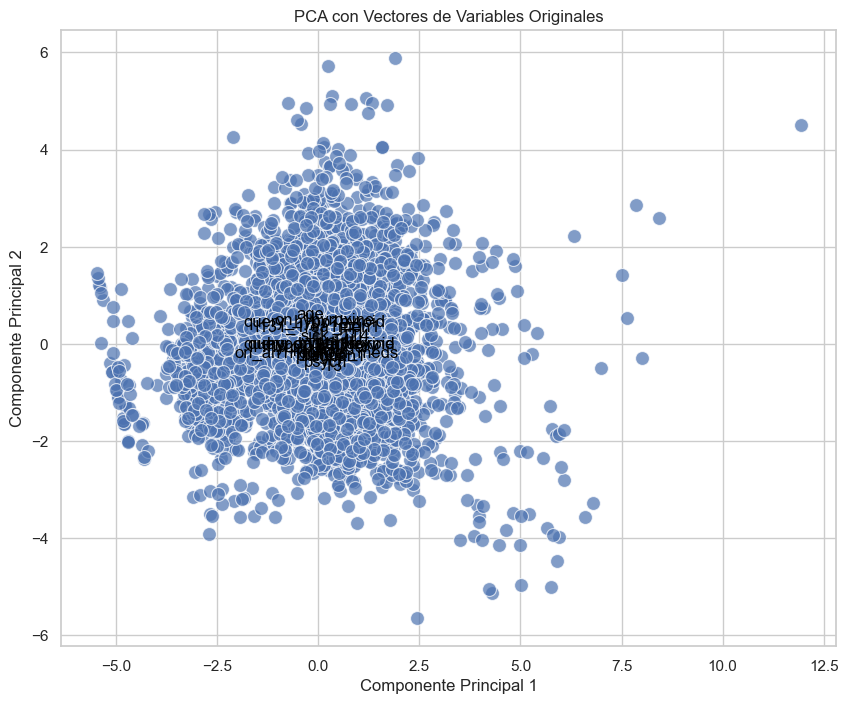

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configurar estilos para las visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Cargar el dataset
file_path = r'C:\Users\jvelareb\OneDrive - Universidad Alfonso X el Sabio\Docencia\Aprendizaje automático\Casos_uso\thyroidDF.csv'

try:
    df = pd.read_csv(file_path, delimiter=";")
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo en la ruta '{file_path}' no se encontró.")
    exit()
except pd.errors.ParserError:
    print("Error: El archivo no se pudo analizar. Verifica el formato del CSV.")
    exit()

# 2. Verificar los nombres de las columnas
print("\nNombres de las columnas en el dataset:")
print(df.columns.tolist())



# 4. Inspeccionar las primeras filas
print("\nPrimeras 5 filas del dataset:")
print(df.head())

# 5. Preprocesamiento de los Datos

# Seleccionar columnas numéricas excluyendo identificadores
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'patient_id' in numerical_cols:
    numerical_cols.remove('patient_id')

print("\nColumnas numéricas seleccionadas para PCA:", numerical_cols)

# Verificar valores faltantes en columnas numéricas
print("\nValores faltantes por columna:")
print(df[numerical_cols].isnull().sum())

# Eliminar filas con valores faltantes en columnas numéricas
df_cleaned = df.dropna(subset=numerical_cols)
print(f"\nNúmero de filas después de eliminar valores faltantes: {df_cleaned.shape[0]}")

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[numerical_cols])

# Convertir a DataFrame para mayor claridad
df_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)
print("\nDatos estandarizados:")
print(df_scaled.head())

# 6. Aplicar PCA

# Inicializar PCA con 2 componentes
pca = PCA(n_components=2)

# Ajustar PCA a los datos estandarizados y transformar los datos
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# No hay una columna 'Class', así que no la concatenamos
final_df = pca_df

print("\nComponentes principales:")
print(final_df.head())

# Obtener el porcentaje de varianza explicada
varianza_explicada = pca.explained_variance_ratio_
print("\nVarianza explicada por cada componente:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# 7. Visualizar los Resultados

# a. Visualización de las Componentes Principales
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=final_df, s=100, alpha=0.7)
plt.title('PCA de Thyroid Dataset (Sin Clase)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# b. Dibujar los Vectores (Cargas) de las Variables Originales

# Obtener las cargas (vectores propios)
cargas = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame para las cargas
cargas_df = pd.DataFrame(cargas, index=numerical_cols, columns=['PC1', 'PC2'])

print("\nCargas de las variables en las componentes principales:")
print(cargas_df)

# Dibujar los vectores
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=final_df, s=100, alpha=0.7)

for var in numerical_cols:
    plt.arrow(0, 0, cargas_df.loc[var, 'PC1'], cargas_df.loc[var, 'PC2'], 
              color='black', alpha=0.5, head_width=0.05)
    plt.text(cargas_df.loc[var, 'PC1']*1.1, cargas_df.loc[var, 'PC2']*1.1, 
             var, color='black', ha='center', va='center')

plt.title('PCA con Vectores de Variables Originales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


Las Componentes Principales (PC) son combinaciones lineales de las variables originales que capturan la mayor parte de la varianza en los datos. Cada componente principal es ortogonal (perpendicular) a las demás, lo que garantiza que sean independientes entre sí.
Puntos Clave:
PC1 y PC2 Combinados: Representan un nuevo espacio bidimensional que resume la información más relevante de las variables originales.
Signo de los Valores: Indica la dirección relativa en el espacio de las componentes, pero no afecta la magnitud de la varianza explicada.

La varianza explicada por una componente principal indica la proporción de la variabilidad total en los datos que esa componente captura. Es una medida de cuán representativa es la componente respecto a los datos originales.

Puntos Clave:
Depende del propósito del análisis. En muchos casos, se busca que las primeras dos componentes expliquen al menos el 50-70% de la variabilidad total para considerarlas representativas. En tu caso, con aproximadamente 17.47%, estás por debajo de este umbral, lo que indica que las dos primeras componentes no capturan una gran parte de la variabilidad total en los datos.



Evaluación de la Eficiencia del PCA:

Mayor Varianza Explicada: Indica que las componentes están capturando más información relevante de los datos originales.
Número de Componentes: Si se busca una representación más completa, se pueden considerar más componentes, aunque en un espacio bidimensional, hay una limitación inherente.

Interpretación PC1:

Cargas de las Variables en PC1:

TT4 (0.839505): Alta carga positiva.
FTI (0.724990): Alta carga positiva.
T4U (0.651931): Alta carga positiva.
T3 (0.325702): Carga positiva moderada.
pregnant (0.285426): Carga positiva moderada.
psych (0.151675): Carga positiva baja.
on_thyroxine (0.141028): Carga positiva baja.
goitre (0.069343): Carga positiva muy baja.
tumor (0.055042): Carga positiva muy baja.
lithium (0.020664): Carga positiva muy baja.
age (-0.172268): Carga negativa baja.
query_on_thyroxine (0.018883): Carga positiva muy baja.
on_antithyroid_meds (-0.035751): Carga negativa muy baja.
sick (-0.082039): Carga negativa baja.
thyroid_surgery (-0.014754): Carga negativa muy baja.
I131_treatment (-0.023671): Carga negativa muy baja.
query_hypothyroid (-0.076391): Carga negativa baja.
query_hyperthyroid (0.076795): Carga positiva muy baja.
hypopituitary (0.000000): Sin carga.
TBG (0.074343): Carga positiva muy baja.

PC1 está fuertemente influenciada por las variables TT4, FTI, y T4U, que son indicadores clave de la función tiroidea. Estas variables tienen cargas altas y positivas, lo que significa que:

TT4 (Triyodotironina Total): Refleja la cantidad total de T4 en sangre, incluyendo lo ligado a proteínas y lo libre.
FTI (Free Thyroxine Index): Estima la cantidad de T4 libre, que es bioactiva.
T4U (T4 Binding Urine): Indica la capacidad de unión de la tiroxina en la orina, relacionada con la disponibilidad de T4.

PC1 representa una dimensión relacionada con los niveles de hormonas tiroideas. Las altas cargas de TT4, FTI y T4U sugieren que esta componente captura la variabilidad en la actividad tiroidea de los individuos. En otras palabras, PC1 refleja cómo los niveles de T4 y su disponibilidad varían entre los pacientes.

Interpretación PC2:

Cargas de las Variables en PC2:

age (0.5482315): Alta carga positiva.
on_thyroxine (0.4502842): Carga positiva moderada.
I131_treatment (0.3074002): Carga positiva moderada.
query_hypothyroid (0.4123167): Carga positiva moderada.
query_on_thyroxine (-0.0116518): Carga negativa muy baja.
query_hyperthyroid (-0.01058795): Carga negativa muy baja.
on_antithyroid_meds (-0.1734547): Carga negativa baja.
goitre (-0.1731247): Carga negativa baja.
tumor (-0.2232328): Carga negativa baja.
pregnant (-0.2302299): Carga negativa baja.
sick (0.1499876): Carga positiva baja.
psych (-0.3386624): Carga negativa moderada.
T3 (-0.4222602): Carga negativa moderada.
lithium (-0.1350800): Carga negativa baja.
TBG (-0.02508503): Carga negativa muy baja.
thyroid_surgery (-0.05483972): Carga negativa muy baja.
hypopituitary (4.957494e-22): Carga prácticamente nula.
Nota: Un valor cercano a cero indica que la variable no contribuye significativamente a la componente.
FTI (0.2781818): Carga positiva moderada.
T4U (0.05233368): Carga positiva muy baja.
T3 (0.325702): Carga positiva moderada.
Interpretación de PC2:

PC2 está moderadamente influenciada por las siguientes variables:

age (0.5482315): Alta carga positiva.
on_thyroxine (0.4502842): Carga positiva moderada.
query_hypothyroid (0.4123167): Carga positiva moderada.
I131_treatment (0.3074002): Carga positiva moderada.
T3 (-0.4222602): Carga negativa moderada.
psych (-0.3386624): Carga negativa moderada.
Además, pregnant, on_antithyroid_meds, goitre, y tumor tienen cargas negativas bajas, lo que sugiere una ligera relación inversa con esta componente.

Conclusión sobre PC2:

PC2 parece capturar una dimensión relacionada con la edad y ciertos tratamientos o condiciones clínicas. La alta carga positiva de age indica que esta componente está fuertemente influenciada por la edad de los pacientes. Las cargas positivas de on_thyroxine, I131_treatment, y query_hypothyroid sugieren que PC2 también refleja aspectos de tratamientos médicos y condiciones relacionadas con la función tiroidea.

Por otro lado, las cargas negativas de T3 y psych sugieren que esta componente también está relacionada con niveles de T3 y posiblemente con aspectos psicológicos o estado de salud mental de los pacientes.

# ANALISIS SOLO VARIABLES NUMERICAS

Dataset cargado exitosamente.

Columnas numéricas: ['age', 'on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'hypopi1ui1ary', 'psych', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'patient_id']

Variables binarias (0 y 1): ['on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'psych']

Variables numéricas continuas antes de excluir 'patient_id': ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'patient_id']

'patient_id' excluida de las variables continuas.

Variables numéricas continuas seleccionadas para PCA: ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Variables numéricas continuas seleccionadas para PCA: ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Valores faltantes por columna:


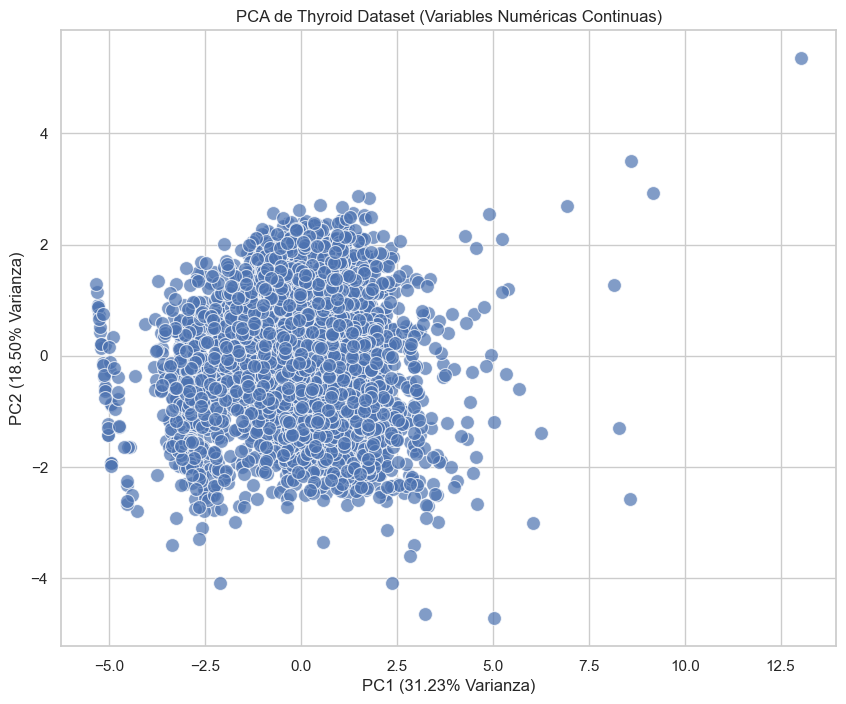

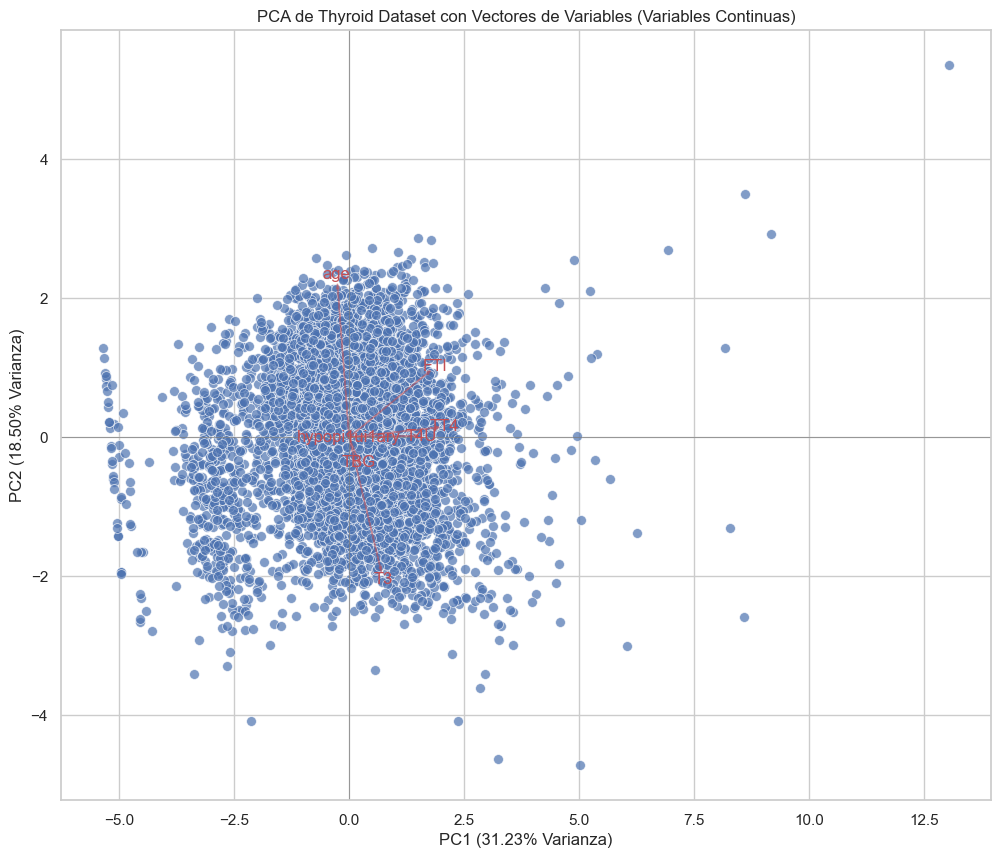

                        PC1           PC2
age           -8.207457e-02  7.108570e-01
hypopi1ui1ary -2.775558e-16  2.220446e-16
T3             2.246924e-01 -6.214653e-01
TT4            6.272799e-01  4.554097e-02
T4U            4.726076e-01  5.836922e-03
FTI            5.670667e-01  3.067922e-01
TBG            6.613891e-02 -1.106058e-01


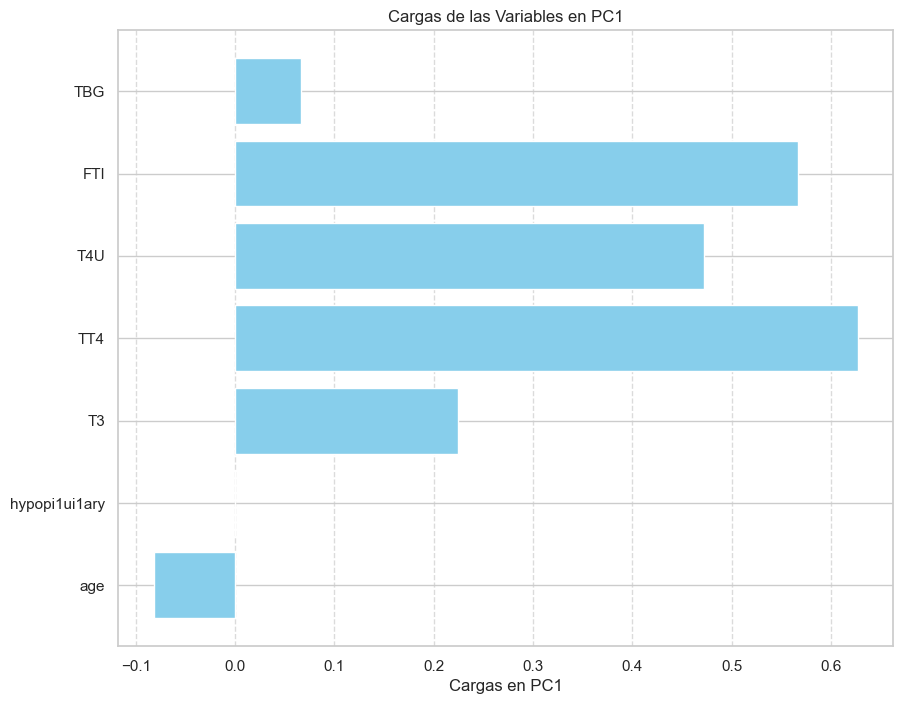

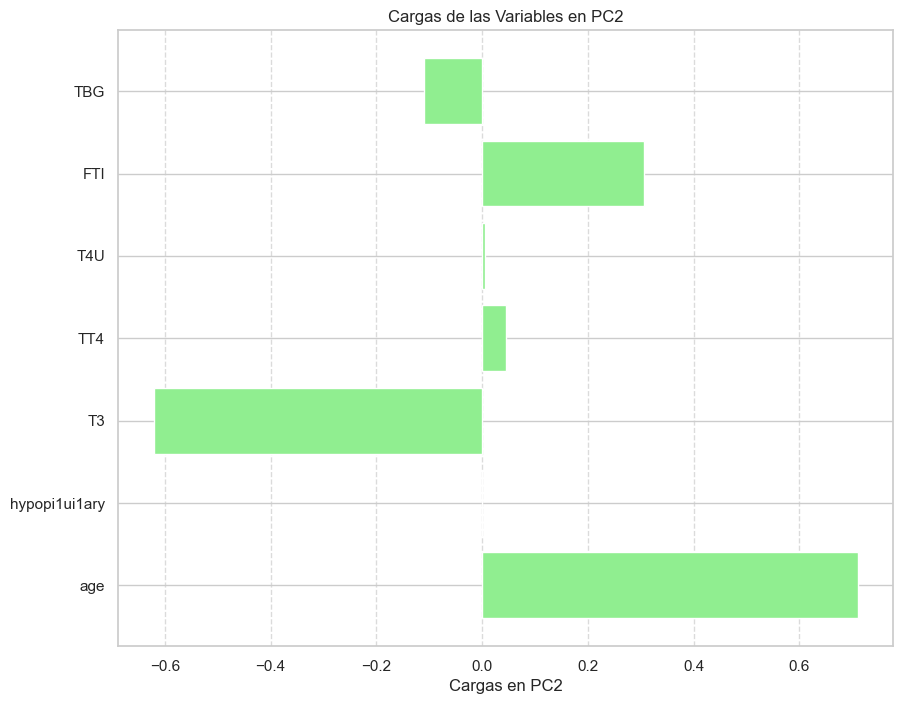

                        PC1           PC2
age           -8.207457e-02  7.108570e-01
hypopi1ui1ary -2.775558e-16  2.220446e-16
T3             2.246924e-01 -6.214653e-01
TT4            6.272799e-01  4.554097e-02
T4U            4.726076e-01  5.836922e-03
FTI            5.670667e-01  3.067922e-01
TBG            6.613891e-02 -1.106058e-01


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configurar estilos para las visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Cargar el dataset
file_path = r'C:\Users\jvelareb\OneDrive - Universidad Alfonso X el Sabio\Docencia\Aprendizaje automático\Casos_uso\thyroidDF.csv'
df = pd.read_csv(file_path, delimiter=";")
print("Dataset cargado exitosamente.")

# 2. Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas:", numerical_cols)

# 3. Identificar variables binarias
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    if sorted(unique_values) == [0, 1]:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

print("\nVariables binarias (0 y 1):", binary_cols)
print("\nVariables numéricas continuas antes de excluir 'patient_id':", continuous_cols)

# 4. Excluir 'patient_id' de las variables continuas si está presente
if 'patient_id' in continuous_cols:
    continuous_cols.remove('patient_id')
    print("\n'patient_id' excluida de las variables continuas.")

print("\nVariables numéricas continuas seleccionadas para PCA:", continuous_cols)

# 5. Seleccionar solo variables numéricas continuas
df_continuous = df[continuous_cols]
print("\nVariables numéricas continuas seleccionadas para PCA:", df_continuous.columns.tolist())

# 6. Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(df_continuous.isnull().sum())

# Eliminar filas con valores faltantes
df_cleaned = df_continuous.dropna()
print(f"\nNúmero de filas después de eliminar valores faltantes: {df_cleaned.shape[0]}")

# 7. Estandarizar las variables numéricas continuas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

df_scaled = pd.DataFrame(X_scaled, columns=continuous_cols)
print("\nDatos estandarizados:")
print(df_scaled.head())

# 8. Aplicar PCA
n_components = 2  # Puedes ajustar este número según tus necesidades
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])
print("\nComponentes principales:")
print(pca_df.head())

# 9. Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# 10. Visualización: Scatter Plot
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA de Thyroid Dataset (Variables Numéricas Continuas)')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

# 11. Visualización: Biplot Mejorado
cargas = pca.components_.T
escalamiento = 3  # Ajusta este valor según tus datos
cargas_scaled = cargas * escalamiento

plt.figure(figsize=(12,10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.7)

# Dibujar los vectores
for i, var in enumerate(continuous_cols):
    plt.arrow(0, 0, cargas_scaled[i,0], cargas_scaled[i,1], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(cargas_scaled[i,0]*1.1, cargas_scaled[i,1]*1.1, 
             var, color='r', ha='center', va='center')

plt.title('PCA de Thyroid Dataset con Vectores de Variables (Variables Continuas)')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

# 12. Visualización: Gráficos de Cargas Separados
cargas_df = pd.DataFrame(cargas, index=continuous_cols, columns=['PC1', 'PC2'])
print(cargas_df)

# Gráfico de Cargas para PC1
plt.figure(figsize=(10,8))
plt.barh(cargas_df.index, cargas_df['PC1'], color='skyblue')
plt.xlabel('Cargas en PC1')
plt.title('Cargas de las Variables en PC1')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de Cargas para PC2
plt.figure(figsize=(10,8))
plt.barh(cargas_df.index, cargas_df['PC2'], color='lightgreen')
plt.xlabel('Cargas en PC2')
plt.title('Cargas de las Variables en PC2')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()
print(cargas_df)




Interpretación de las Componentes Principales
Componente Principal 1 (PC1)
Varianza Explicada por PC1: 10.26%
Cargas de las Variables en PC1:
TT4 (0.627): Alta carga positiva.
FTI (0.567): Alta carga positiva.
T4U (0.473): Alta carga positiva.
T3 (0.225): Carga positiva moderada.
TBG (0.066): Carga positiva baja.
age (-0.082): Carga negativa baja.
hypopituitary (~0): Carga prácticamente nula.
Interpretación de PC1:
PC1 está fuertemente influenciada por las variables TT4, FTI, y T4U, todas relacionadas con la función tiroidea y los niveles de la hormona T4 en el organismo.

TT4 (Triyodotironina Total): Representa la cantidad total de T4 en sangre, incluyendo lo ligado a proteínas y lo libre.
FTI (Free Thyroxine Index): Estima la cantidad de tiroxina libre, que es la forma bioactiva de T4.
T4U (T4 Binding Urine): Indica la capacidad de unión de la tiroxina en la orina, relacionada con la disponibilidad de T4.
La carga positiva de estas variables sugiere que a mayores niveles de TT4, FTI y T4U, PC1 también aumenta. La carga positiva moderada de T3 indica que también influye positivamente en esta componente, aunque en menor medida. La carga negativa baja de age sugiere una ligera relación inversa con PC1, pero su impacto es mínimo.

Conclusión sobre PC1:

PC1 puede interpretarse como una dimensión que refleja la actividad tiroidea total. Captura la variabilidad en los niveles de hormonas tiroideas (T4 y su disponibilidad) en los pacientes.

Componente Principal 2 (PC2)
Varianza Explicada por PC2: 7.21%
Cargas de las Variables en PC2:
age (0.711): Alta carga positiva.
T3 (-0.621): Alta carga negativa.
FTI (0.307): Carga positiva moderada.
TT4 (0.046): Carga positiva muy baja.
T4U (0.006): Carga positiva muy baja.
TBG (-0.111): Carga negativa baja.
hypopituitary (~0): Carga prácticamente nula.
Interpretación de PC2:
PC2 está principalmente influenciada por age y T3.

age (Edad) (0.711): Indica que a mayor edad, PC2 también aumenta significativamente.
T3 (-0.621): La carga negativa sugiere que a mayores niveles de T3, PC2 disminuye.
FTI (0.307): Tiene una carga positiva moderada, lo que implica que a mayores valores de FTI, PC2 también aumenta, aunque de manera menos pronunciada.
TBG (-0.111): Carga negativa baja, sugiriendo una leve relación inversa con PC2.
Conclusión sobre PC2:

PC2 puede interpretarse como una dimensión que combina la edad de los pacientes con los niveles de T3. La edad está positivamente correlacionada con PC2, mientras que T3 está negativamente correlacionada, indicando que a medida que la edad aumenta, los niveles de T3 tienden a disminuir, o viceversa.

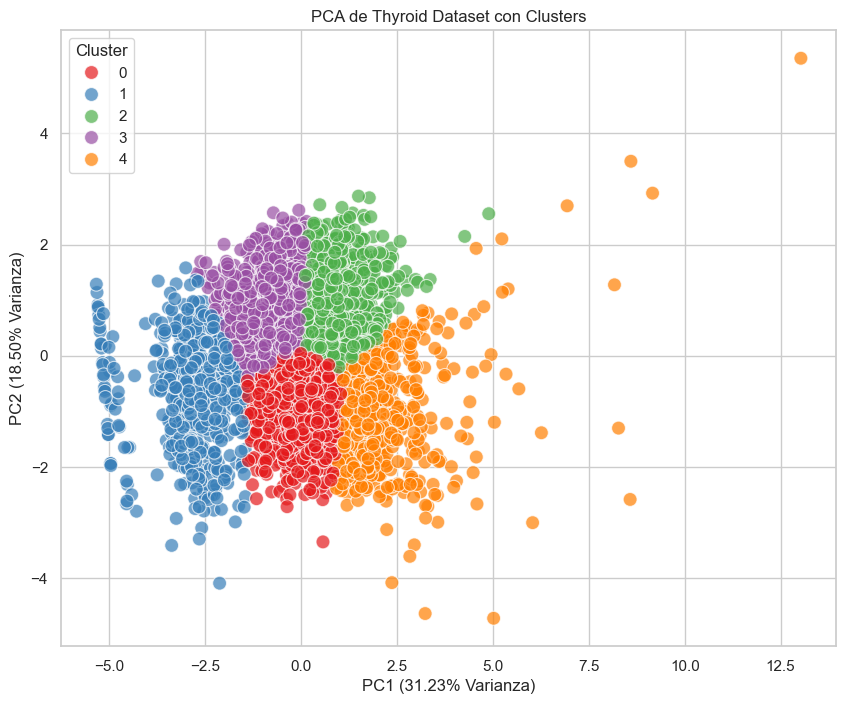

In [11]:
from sklearn.cluster import KMeans

# Determinar el número óptimo de clusters, por ejemplo, 3
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Añadir clusters al DataFrame
pca_df['Cluster'] = clusters

# Visualizar
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA de Thyroid Dataset con Clusters')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()


# KMEANS
K-Means es una de las técnicas de clustering más populares y ampliamente utilizadas en el aprendizaje no supervisado. Su objetivo es dividir un conjunto de datos en K clusters donde cada observación pertenece al cluster con la media más cercana.

Métodos para Determinar el Número Óptimo de Clusters
Seleccionar el número adecuado de clusters (K) es crucial para obtener resultados significativos. Dos métodos comunes son:

Método del Codo (Elbow Method): Analiza la varianza explicada en función del número de clusters y busca el punto donde la reducción de la varianza empieza a desacelerarse, formando un "codo".
Análisis de Silueta (Silhouette Analysis): Evalúa cómo de similar es una observación a su propio cluster en comparación con otros clusters. Valores más altos indican una mejor asignación.

El Análisis de Silueta mide la calidad de la asignación de cada punto al cluster. Un valor de silueta cercano a 1 indica una buena asignación, mientras que valores cercanos a -1 indican una mala asignación.

Pasos a Seguir:
Calcular el coeficiente de silueta para diferentes valores de K.
Graficar los coeficientes para identificar el K con mayor silueta media.

In [24]:
import pandas as pd
import numpy as np

# Cargar el dataset
file_path = r'C:\Users\jvelareb\OneDrive - Universidad Alfonso X el Sabio\Docencia\Aprendizaje automático\Casos_uso\thyroidDF.csv'

try:
    df = pd.read_csv(file_path, delimiter=";")
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo en la ruta '{file_path}' no se encontró.")
    exit()
except pd.errors.ParserError:
    print("Error: El archivo no se pudo analizar. Verifica el formato del CSV.")
    exit()
df["patient_id"].drop
print(df)


Dataset cargado exitosamente.
      age  on_1hyroxine  query_on_1hyroxine  on_an1i1hyroid_meds  sick  \
0      29             0                   0                    0     0   
1      28             0                   0                    0     0   
2      28             0                   0                    0     0   
3      28             0                   0                    0     0   
4      54             0                   0                    0     0   
...   ...           ...                 ...                  ...   ...   
6205   80             0                   0                    0     0   
6206   64             0                   0                    0     0   
6207   16             0                   0                    0     0   
6208   54             0                   0                    0     0   
6209   78             0                   0                    0     0   

      pregnan1  1hyroid_surgery  I131_1rea1men1  query_hypo1hyroid  \
0          

Dataset cargado exitosamente.

La columna 'patient_id' ha sido eliminada correctamente.

Columnas numéricas: ['age', 'on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'hypopi1ui1ary', 'psych', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Variables binarias (0 y 1): ['on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'psych']

Variables numéricas continuas: ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Variables numéricas continuas seleccionadas para clustering: ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Valores faltantes por columna:
age              0
hypopi1ui1ary    0
T3               0
TT4              0
T4U              0
FTI              0
TBG              0
dtype: int64

Número de f

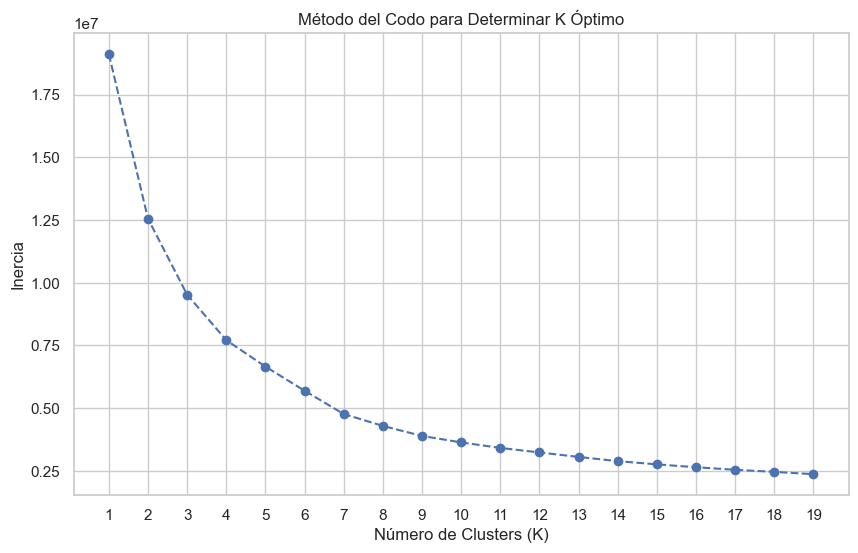

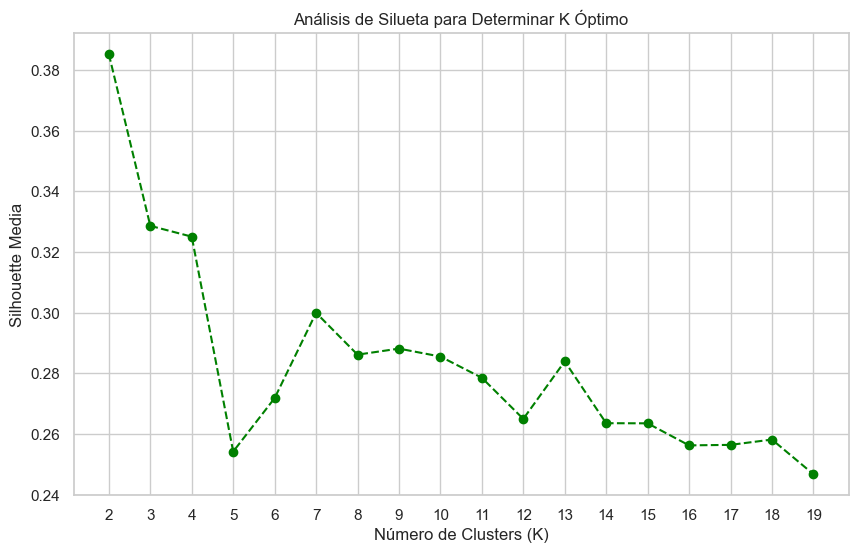


Asignación de Clusters:
   age  hypopi1ui1ary   T3    TT4  T4U  FTI  TBG  Cluster
0   29              0  1.9  128.0  0.0  0.0    0        6
1   28              0  2.6  116.0  0.0  0.0    0        6
2   28              0  1.8   76.0  0.0  0.0    0        6
3   28              0  1.7   83.0  0.0  0.0    0        6
4   54              0  2.3  133.0  0.0  0.0    0        6


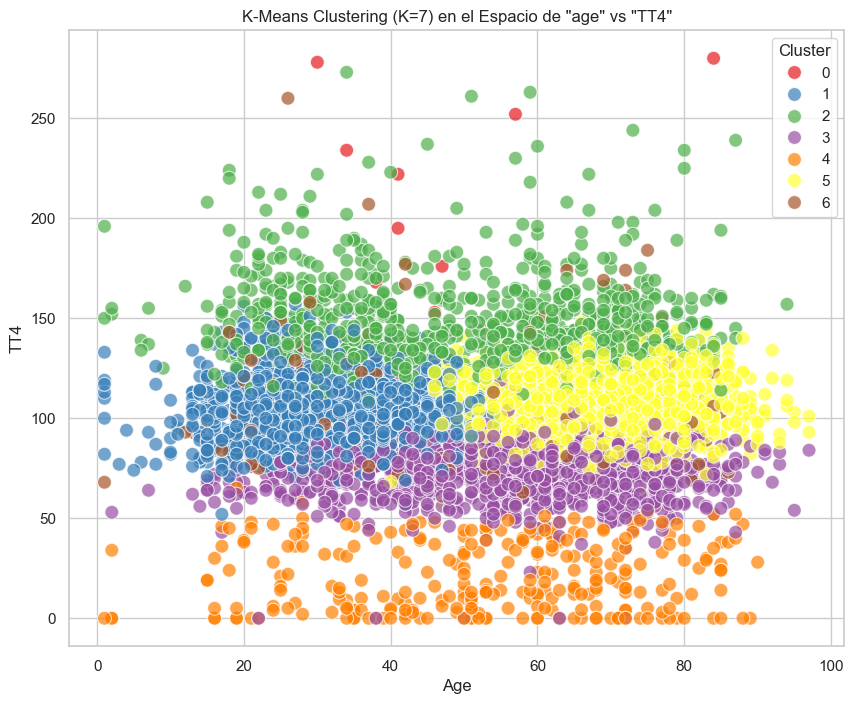

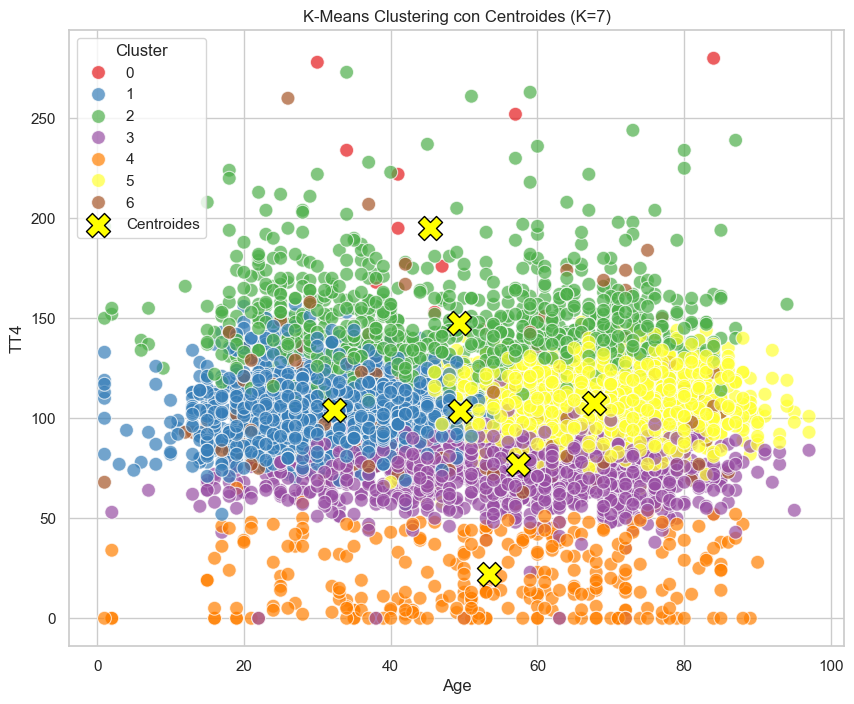

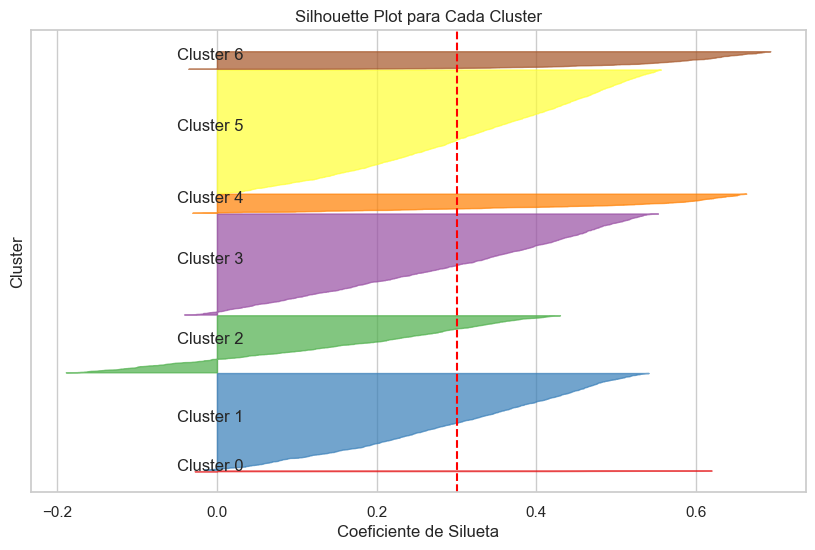

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Configurar estilos para las visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Cargar el dataset
file_path = r'C:\Users\jvelareb\OneDrive - Universidad Alfonso X el Sabio\Docencia\Aprendizaje automático\Casos_uso\thyroidDF.csv'

try:
    df = pd.read_csv(file_path, delimiter=";")
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo en la ruta '{file_path}' no se encontró.")
    exit()
except pd.errors.ParserError:
    print("Error: El archivo no se pudo analizar. Verifica el formato del CSV.")
    exit()

# 2. Eliminar la columna 'patient_id' si existe
if 'patient_id' in df.columns:
    df = df.drop('patient_id', axis=1)
    print("\nLa columna 'patient_id' ha sido eliminada correctamente.")
else:
    print("\nLa columna 'patient_id' no está presente en el DataFrame.")

# 3. Identificar variables binarias y continuas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas:", numerical_cols)

binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    if sorted(unique_values) == [0, 1]:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

print("\nVariables binarias (0 y 1):", binary_cols)
print("\nVariables numéricas continuas:", continuous_cols)

# 4. Seleccionar solo variables numéricas continuas
df_continuous = df[continuous_cols]
print("\nVariables numéricas continuas seleccionadas para clustering:", df_continuous.columns.tolist())

# 5. Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(df_continuous.isnull().sum())

# Eliminar filas con valores faltantes
df_cleaned = df_continuous.dropna()
print(f"\nNúmero de filas después de eliminar valores faltantes: {df_cleaned.shape[0]}")

# 6. (Omitir Estandarización ya que el usuario solicita no escalar los datos)

# 7. Método del Codo
inercia = []
rangos_k = range(1, 20)

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned)
    inercia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(10,6))
plt.plot(rangos_k, inercia, marker='o', linestyle='--')
plt.title('Método del Codo para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(rangos_k)
plt.grid(True)
plt.show()

# 8. Análisis de Silueta
silhueta_media = []
rangos_k_sil = range(2, 20)

for k in rangos_k_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_cleaned)
    sil_score = silhouette_score(df_cleaned, labels)
    silhueta_media.append(sil_score)

# Graficar el Análisis de Silueta
plt.figure(figsize=(10,6))
plt.plot(rangos_k_sil, silhueta_media, marker='o', linestyle='--', color='green')
plt.title('Análisis de Silueta para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Media')
plt.xticks(rangos_k_sil)
plt.grid(True)
plt.show()

# 9. Seleccionar K óptimo basado en los análisis previos
# Supongamos que K=3 es óptimo
k_optimo = 7

# 10. Aplicar K-Means con K óptimo
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_cleaned)

# Añadir los labels de los clusters al DataFrame limpio
df_cleaned['Cluster'] = clusters

print("\nAsignación de Clusters:")
print(df_cleaned.head())

# 11. Visualización: Scatter Plot con Clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='TT4', hue='Cluster', data=df_cleaned, palette='Set1', s=100, alpha=0.7)
plt.title(f'K-Means Clustering (K={k_optimo}) en el Espacio de "age" vs "TT4"')
plt.xlabel('Age')
plt.ylabel('TT4')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 12. Visualización: Centroides en el Scatter Plot
# Obtener los índices de las columnas 'age' y 'TT4'
age_idx = continuous_cols.index('age')
TT4_idx = continuous_cols.index('TT4')

# Obtener los centroides para 'age' y 'TT4'
centroides = kmeans.cluster_centers_

plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='TT4', hue='Cluster', data=df_cleaned, palette='Set1', s=100, alpha=0.7)
plt.scatter(centroides[:, age_idx], centroides[:, TT4_idx], 
            s=300, c='yellow', label='Centroides', edgecolor='black', marker='X')
plt.title(f'K-Means Clustering con Centroides (K={k_optimo})')
plt.xlabel('Age')
plt.ylabel('TT4')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 13. Silhouette Plot para Clusters
silhouette_vals = silhouette_samples(df_cleaned.iloc[:, :-1], df_cleaned['Cluster'])

plt.figure(figsize=(10,6))
y_lower = 10
for i in range(k_optimo):
    # Obtener las siluetas para el cluster i
    ith_cluster_silhouette_vals = silhouette_vals[df_cleaned['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()
    
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = sns.color_palette("Set1")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, color=color, alpha=0.7)
    
    # Etiqueta para el cluster i
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    
    y_lower = y_upper + 10  # Espaciado entre clusters

plt.title("Silhouette Plot para Cada Cluster")
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Cluster")
plt.axvline(x=silhouette_score(df_cleaned.iloc[:, :-1], df_cleaned['Cluster']), color="red", linestyle="--")
plt.yticks([])  # Quitar etiquetas del eje Y
plt.show()


K=2: Davies-Bouldin Index=1.0525
K=3: Davies-Bouldin Index=1.0764
K=4: Davies-Bouldin Index=0.9152
K=5: Davies-Bouldin Index=1.0586
K=6: Davies-Bouldin Index=0.9411
K=7: Davies-Bouldin Index=0.8814
K=8: Davies-Bouldin Index=0.9292
K=9: Davies-Bouldin Index=0.9119
K=10: Davies-Bouldin Index=0.9316
K=11: Davies-Bouldin Index=0.9661
K=12: Davies-Bouldin Index=0.9850
K=13: Davies-Bouldin Index=0.9693
K=14: Davies-Bouldin Index=0.9705
K=15: Davies-Bouldin Index=0.9881
K=16: Davies-Bouldin Index=1.0175
K=17: Davies-Bouldin Index=1.0066
K=18: Davies-Bouldin Index=1.0229
K=19: Davies-Bouldin Index=0.9891


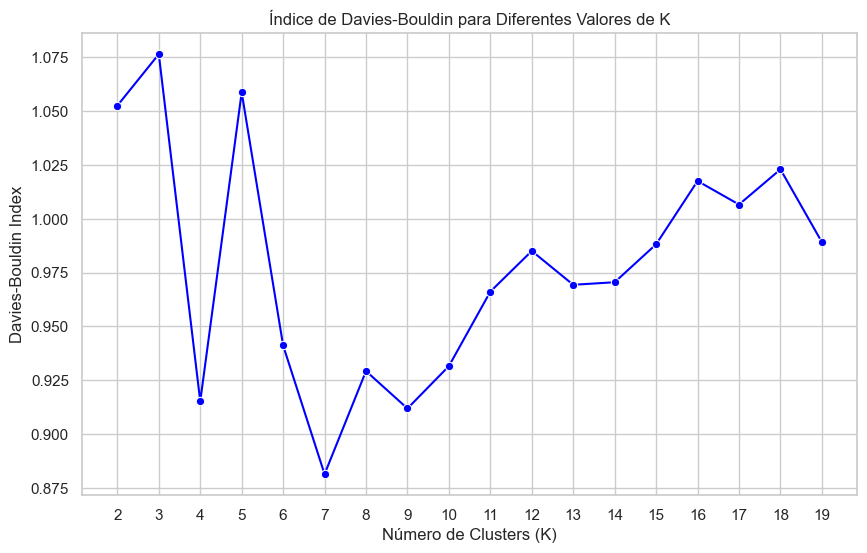

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilos para las visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Lista para almacenar los valores de Davies-Bouldin
dbi_scores = []

# Rango de K de 2 a 15
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_cleaned)
    dbi = davies_bouldin_score(df_cleaned, labels)
    dbi_scores.append(dbi)
    print(f"K={k}: Davies-Bouldin Index={dbi:.4f}")

# Crear un DataFrame para facilitar la visualización
df_dbi = pd.DataFrame({'K': k_values, 'DBI': dbi_scores})

plt.figure(figsize=(10,6))
sns.lineplot(x='K', y='DBI', data=df_dbi, marker='o', color='blue')
plt.title('Índice de Davies-Bouldin para Diferentes Valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Interpretación de los Valores del Índice de Silueta
1. Valores Cercanos a +1: Clustering Bien Definido
Descripción: Los puntos están bien asignados a su propio cluster y mal asignados a clusters vecinos.
Interpretación: Indica una alta cohesión y buena separación entre clusters.
Acción Recomendada: Este es el escenario ideal. No se requieren cambios en el número de clusters.
2. Valores Cercanos a 0: Puntos en la Frontera entre Clusters
Descripción: Los puntos están cerca de la frontera entre dos clusters, lo que sugiere una superposición.
Interpretación: Puede indicar que el número de clusters es inadecuado o que algunos clusters están superpuestos.
Acción Recomendada: Considera revisar el número de clusters o explorar otras variables que puedan mejorar la separación.
3. Valores Cercanos a -1: Puntos Mal Asignados
Descripción: Los puntos están mal asignados al cluster actual y probablemente pertenecen a otro cluster.
Interpretación: Indica una pobre cohesión dentro del cluster y/o una máxima separación de otros clusters.
Acción Recomendada: Revisa la asignación de clusters y considera reajustar el número de clusters o explorar técnicas de preprocesamiento adicionales.
Rangos Comunes de Silhouette Score
Aunque el índice de silueta puede tomar cualquier valor entre -1 y +1, en la práctica, se utilizan los siguientes rangos para una interpretación general:

0.51 - 1.00: Excelente clustering. Los puntos están bien asignados y los clusters están claramente separados.
0.25 - 0.50: Bueno clustering. Existe una superposición moderada entre algunos clusters.
0.00 - 0.25: Aceptable clustering. Los clusters están algo superpuestos, y la asignación de algunos puntos puede ser ambigua.
< 0.00: Pobre clustering. Muchos puntos están mal asignados y los clusters no están bien definidos.